# Práctica 1: Vacunación COVID

## Preparación de la zona de trabajo

Importamos las librerías que vamos a necesitar para realizar la práctica

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tabulate import tabulate

C:\Users\alfre\AppData\Local\Temp\ipykernel_4528\3376911415.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cargamos el dataset en un DataFrame de Pandas

In [2]:
datos = pd.read_csv("vacunaciones.csv")

Vamos a visualizar los primeros y últimos valores de nuestro DataFrame para asegurarnos de que se hayan cargado correctamente

In [3]:
datos.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [4]:
datos.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3207,Wales,NaN,2021-02-14,790211.0,784809.0,5402.0,13987.0,26206.0,25.06,24.89,0.17,8312.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


## Preprocesamiento de los datos

### Estandarización de los nombres

Primero de todo, vamos a estandarizar los nombres de nuestra base de datos:

In [5]:
print(datos.country.unique().tolist())

['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'England', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saint Helena', 'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'Turks an

Podemos observar que tenemos datos de Anguilla, Bermuda, Islas Caimán, Gibraltar, Guernsey, Isla de Man, Jersey, Irlanda del Norte, Inglaterra, Islas Turcas y Caicos, Santa Elena, Escocia, Gales que pertenecen al Reino Unido ("United Kingdom"), por tanto, tenemos información redundante:

In [6]:
datos = datos[datos.country.apply(lambda x: x not in ['Anguilla', 'Bermuda', 'Cayman Islands', 'Gibraltar', 'Guernsey', 
                                                      'Isle of Man', 'Jersey', 'Northern Ireland', 'England', 
                                                      'Turks and Caicos Islands', 'Saint Helena', 'Scotland', 'Wales'])]

Otra cosa que podemos hacer es fusionar Chipre y Chipre del Norte; este último es un estado con reconocimiento limitado que controla aproximadamente un tercio de la isla de Chipre. De hecho, Turquía es el único país que lo reconoce formalmente.

In [7]:
datos.country = datos.country.replace().replace({"Northern Cyprus" : "Cyprus"})

C:\Users\alfre\AppData\Local\Temp\ipykernel_4528\3271055298.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  datos.country = datos.country.replace().replace({"Northern Cyprus" : "Cyprus"})


Comprobamos que todos los nombres de países han sido transformados correctamente

In [8]:
print(datos.country.unique().tolist())

['Albania', 'Algeria', 'Andorra', 'Argentina', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States']


### Ordenamiento por fecha y estandarización de esta

Podemos observar que el DataFrame esta ordenado por país y no por fecha, vamos a ordenarlo por fecha.

In [9]:
datos['date'] = pd.to_datetime(datos['date'])
datos = datos.sort_values('date', ascending=True)

### Tratamiento de los NaNs

Vamos a comprobar la cantidad faltante de datos en cada campo:

In [10]:
datos.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      888
people_vaccinated                      1241
people_fully_vaccinated                1834
daily_vaccinations_raw                 1190
daily_vaccinations                      112
total_vaccinations_per_hundred          888
people_vaccinated_per_hundred          1241
people_fully_vaccinated_per_hundred    1834
daily_vaccinations_per_million          112
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Podemos comprobar que hay bastantes registros faltantes, para solventar los de la columna “people vaccinated” cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para rellenar dicha celda. La media móvil solo la hemos aplicado con los datos respectivos de cada país, no con el total.

In [11]:
datos['people_vaccinated'] = datos.groupby('country')['people_vaccinated'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))

In [12]:
datos.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      888
people_vaccinated                       997
people_fully_vaccinated                1834
daily_vaccinations_raw                 1190
daily_vaccinations                      112
total_vaccinations_per_hundred          888
people_vaccinated_per_hundred          1241
people_fully_vaccinated_per_hundred    1834
daily_vaccinations_per_million          112
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

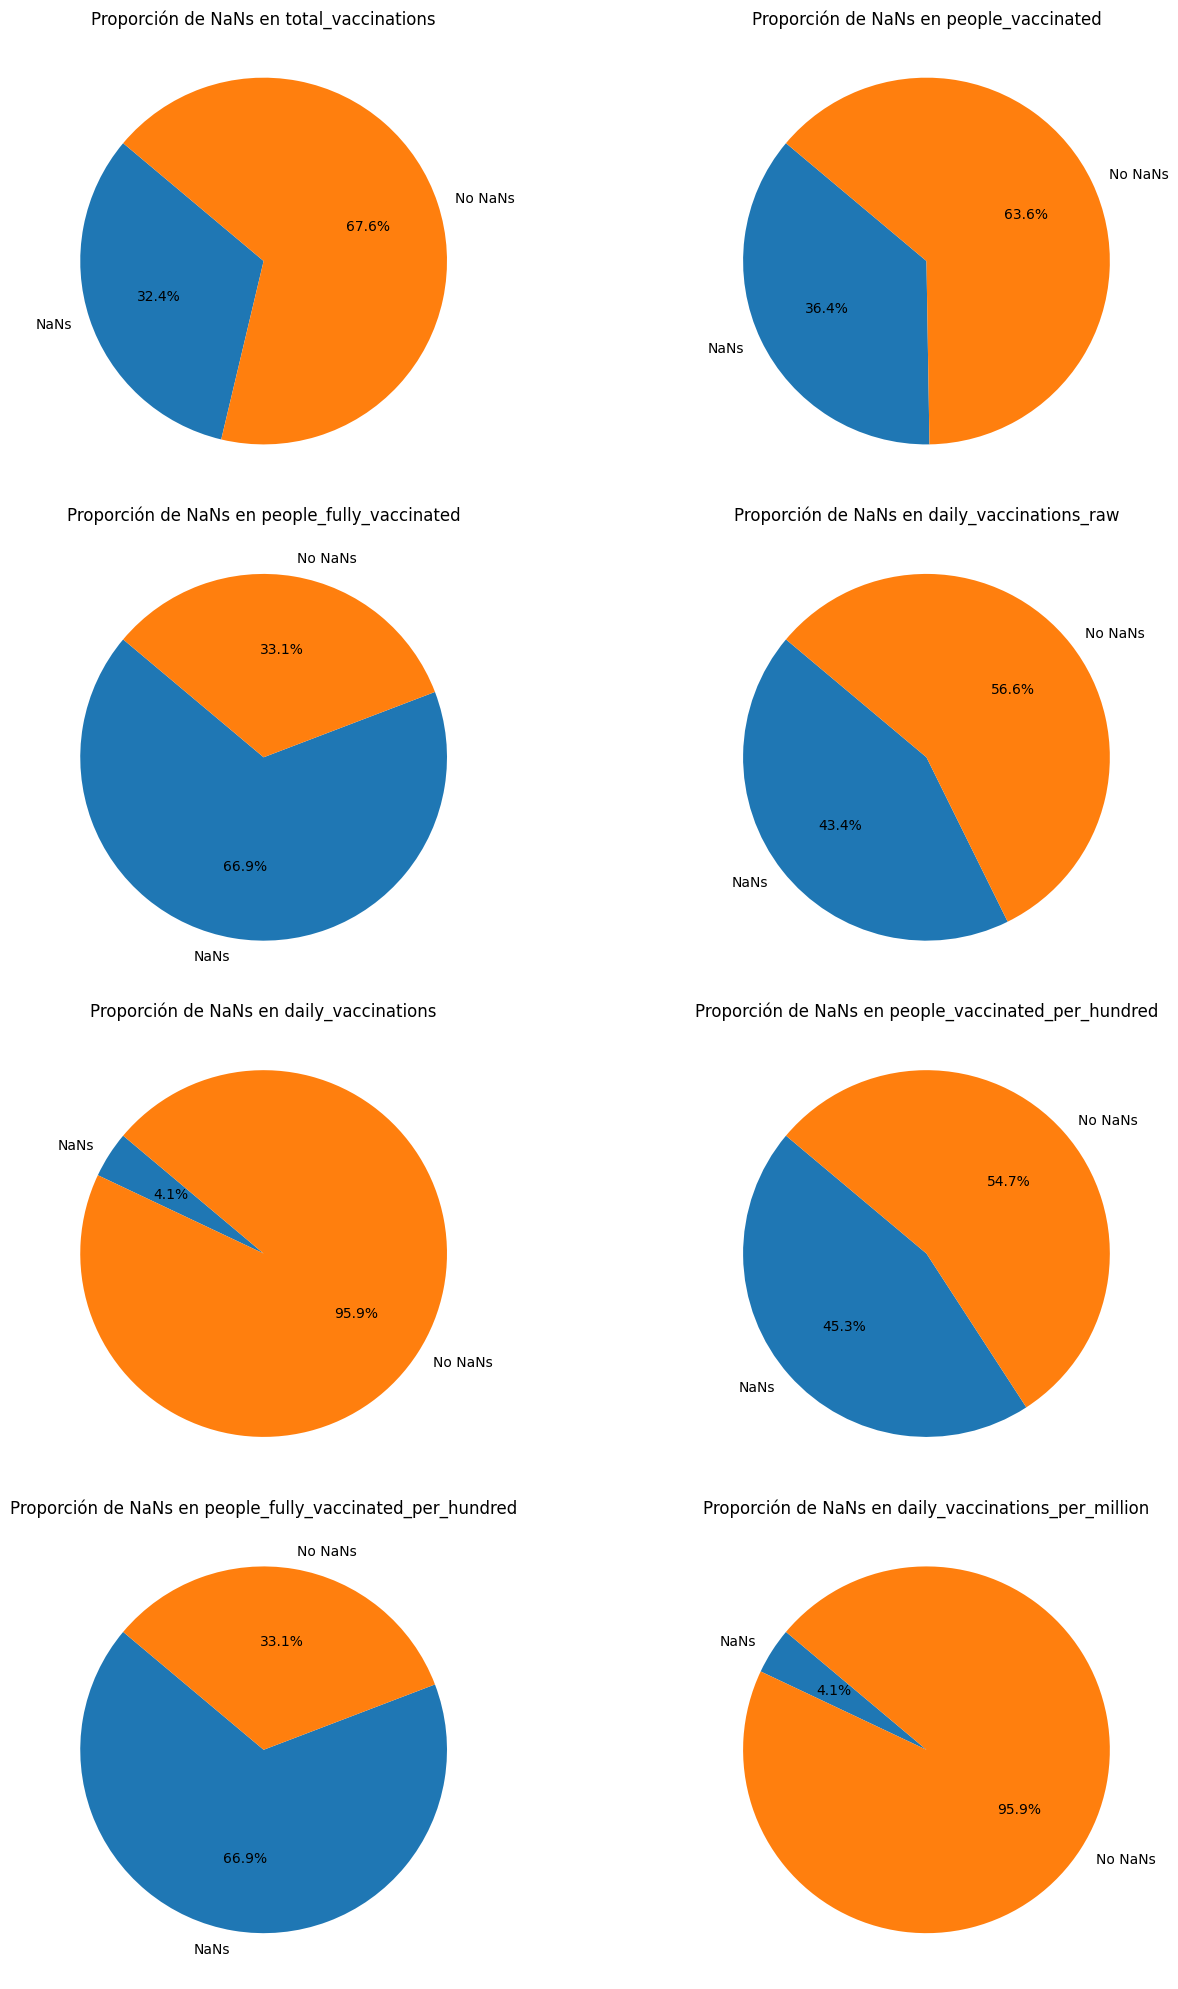

In [13]:
variables_nans = ['total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
                  'daily_vaccinations', 'people_vaccinated_per_hundred',
                  'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, var in enumerate(variables_nans):
    nan_count = datos[var].isna().sum()
    no_nan_count = len(datos) - nan_count
    
    labels = ['NaNs', 'No NaNs']
    sizes = [nan_count, no_nan_count]
    
    row = i // 2
    col = i % 2
    axs[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(f'Proporción de NaNs en {var}')
    
plt.tight_layout()
plt.show()

Es notable que tanto 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'people_fully_vaccinated' y 'people_fully_vaccinated_per_hundred' presentan un alto porcentaje de valores NaN. Esta situación genera preocupación, ya que estos campos son cruciales para evaluar el rendimiento de los planes de vacunación de los países.

In [14]:
nans_vaccinated_hundred = datos[datos['people_vaccinated_per_hundred'].isna()]
cantidad_nans_vaccinated_hundred = nans_vaccinated_hundred.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_vaccinated_hundred = cantidad_nans_vaccinated_hundred.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_vaccinated_hundred

,country,Cantidad NaNs
11,China,57
45,Russia,53
53,Switzerland,50
12,Costa Rica,48
14,Cyprus,42
55,United Arab Emirates,41
38,Netherlands,41
46,Saudi Arabia,40
22,Iceland,39
44,Qatar,38


In [15]:
nans_total_vaccinated_hundred = datos[datos['total_vaccinations_per_hundred'].isna()]
cantidad_nans_total_vaccinated_hundred = nans_total_vaccinated_hundred.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_total_vaccinated_hundred = cantidad_nans_total_vaccinated_hundred.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_total_vaccinated_hundred

,country,Cantidad NaNs
42,Russia,53
11,China,48
12,Costa Rica,45
49,Switzerland,40
22,Iceland,39
48,Sweden,37
41,Qatar,36
14,Cyprus,36
43,Saudi Arabia,31
25,Kuwait,28


In [16]:
nans_fully_vaccinated = datos[datos['people_fully_vaccinated'].isna()]
cantidad_nans_fully_vaccinated = nans_fully_vaccinated.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_fully_vaccinated = cantidad_nans_fully_vaccinated.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_fully_vaccinated

,country,Cantidad NaNs
15,China,57
61,Russia,57
6,Bahrain,55
71,Switzerland,50
16,Costa Rica,48
...,...,...
22,Egypt,7
1,Algeria,2
12,Cambodia,2
34,Iran,2


In [17]:
nans_fully_vaccinated_hundred = datos[datos['people_fully_vaccinated_per_hundred'].isna()]
cantidad_nans_fully_vaccinated_hundred = nans_fully_vaccinated_hundred.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_fully_vaccinated_hundred = cantidad_nans_fully_vaccinated_hundred.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_fully_vaccinated_hundred

,country,Cantidad NaNs
15,China,57
61,Russia,57
6,Bahrain,55
71,Switzerland,50
16,Costa Rica,48
...,...,...
22,Egypt,7
1,Algeria,2
12,Cambodia,2
34,Iran,2


Varios países muestran una cantidad significativa de valores NaN en los campos mencionados anteriormente, lo cual podría complicar el análisis. Es relevante señalar que algunos de estos países, como Rusia o China, tienen una gran relevancia en el contexto de la vacunación contra el COVID-19. Por lo tanto, el análisis podría verse afectado por un sesgo significativo.

Dado que la situación varía considerablemente de un país a otro, al aplicar la media móvil hay que emplear únicamente los datos del país del que queremos hacer la estimación.

In [18]:
datos['people_vaccinated_per_hundred'] = datos.groupby('country')['people_vaccinated_per_hundred'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['total_vaccinations_per_hundred'] = datos.groupby('country')['total_vaccinations_per_hundred'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated'] = datos.groupby('country')['people_fully_vaccinated'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated_per_hundred'] = datos.groupby('country')['people_fully_vaccinated_per_hundred'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))

Vamos a aplicar también la media móvil a "total_vaccinations", "people_fully_vaccinated" y "people_fully_vaccinated_per_hundred"

In [19]:
datos['total_vaccinations'] = datos.groupby('country')['total_vaccinations'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated'] = datos.groupby('country')['people_fully_vaccinated'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated_per_hundred'] = datos.groupby('country')['people_fully_vaccinated_per_hundred'].transform(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))


In [20]:
datos.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      505
people_vaccinated                       997
people_fully_vaccinated                1647
daily_vaccinations_raw                 1190
daily_vaccinations                      112
total_vaccinations_per_hundred          505
people_vaccinated_per_hundred           997
people_fully_vaccinated_per_hundred    1647
daily_vaccinations_per_million          112
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Podemos comprobar que, en términos porcentuales, la cantidad de valores NaN en "daily_vaccinations", "daily_vaccinations_per_million" y "people_vaccinated" es ínfima. Por tanto, podemos optar por eliminar directamente dichos registros.

In [21]:
datos = datos.dropna(subset=['daily_vaccinations', 'daily_vaccinations_per_million', 'people_vaccinated'])
datos.reset_index(drop=True, inplace=True)

Además, los registros en los que no disponemos del campo "total_vaccinations" resultan inútiles para nuestro estudio ya que no conocemos la gente que ha sido vacunada en dichos días, también podemos eliminarlos directamente.

In [22]:
datos = datos.dropna(subset=['total_vaccinations'])
datos.reset_index(drop=True, inplace=True)

Comprobamos nuevamente la cantidad de NaNs en nuestra base de datos:

In [23]:
datos.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                645
daily_vaccinations_raw                 387
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred    645
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

Hemos logrado reducir notablemente la cantidad de valores NaN presentes en nuestra base de datos. Sin embargo, no podemos solucionar las demás variables con valores NaN, ya que dependen de otras variables como el tiempo y la población total del país. Parece contraproducente eliminar las muestras con NaN, ya que, si nos fijamos, "people_fully_vaccinated" y "people_fully_vaccinated_per_hundred" nos proporcionan prácticamente la misma información, por lo que no estamos perdiendo mucho contexto del dataset. Además, la cantidad de NaNs es pequeña en comparación con el resto del dataset. Optaremos por asignarles un valor de 0, ya que previamente hemos aplicado la media móvil para intentar solventar el problema, pero no ha variado su condición. Podemos concluir que los NaNs se encuentran en las primeras fechas recogidas y, por tanto, los países realmente tendrían un valor cercano a 0 en dichas variables.

In [24]:
datos[['people_fully_vaccinated', 'daily_vaccinations_raw', 'people_fully_vaccinated_per_hundred']] = datos[['people_fully_vaccinated', 'daily_vaccinations_raw', 'people_fully_vaccinated_per_hundred']].fillna(0)
datos.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

## Estudio de la Base de Datos

Vamos a comprobar cuáles son los países que más vacunas han puesto

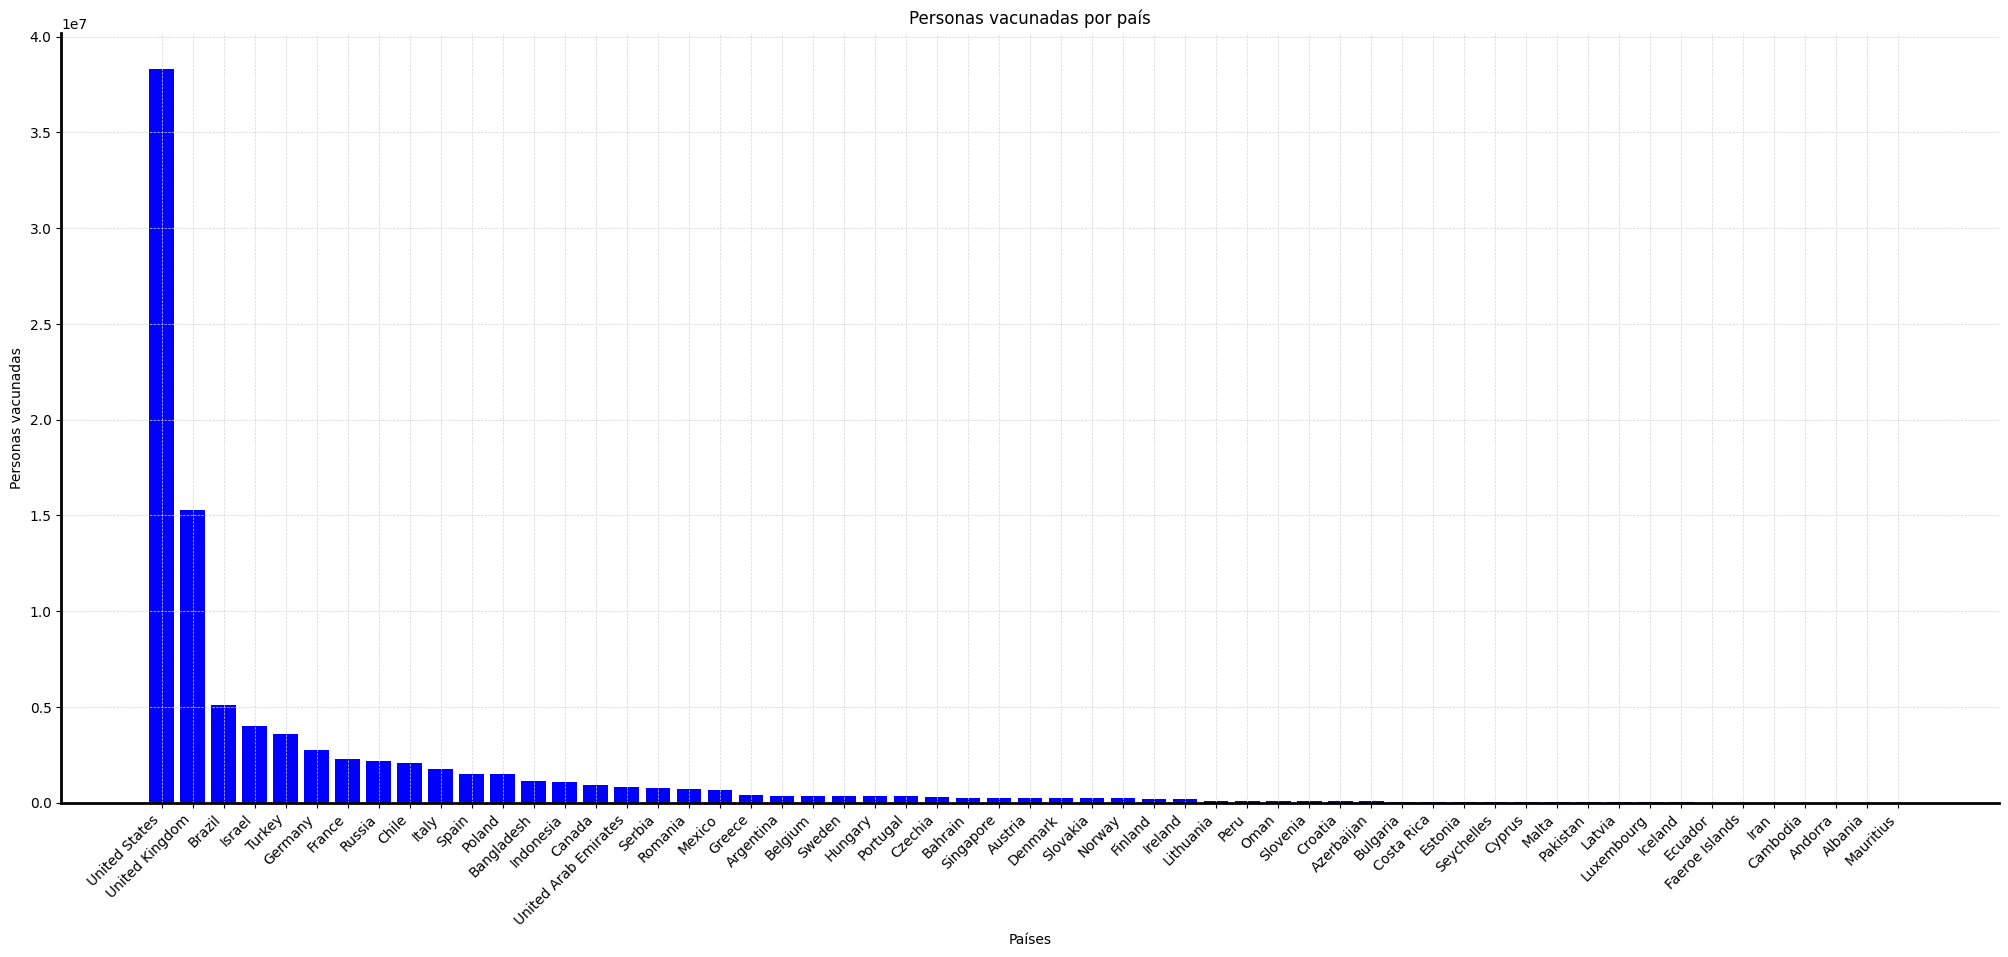

In [25]:
data = datos.sort_values('people_vaccinated', ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(data['country'], data['people_vaccinated'], color='blue')
plt.title('Personas vacunadas por país')
plt.xlabel('Países')
plt.ylabel('Personas vacunadas')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

Parece evidente que los países más poblados y ricos son los que más personas vacunadas tienen, sin embargo, esto no implica per sé que hayan tenido los mejores planes de vacunación, urge investigar los datos con más profundidad.

Vamos a estudiar la variabilidad de los cinco países con más personas vacunadas utilizando un diagrama de líneas que relacione el número de personas vacunadas por país con la fecha. De esta manera, podremos analizar la evolución temporal y también identificar la tendencia.

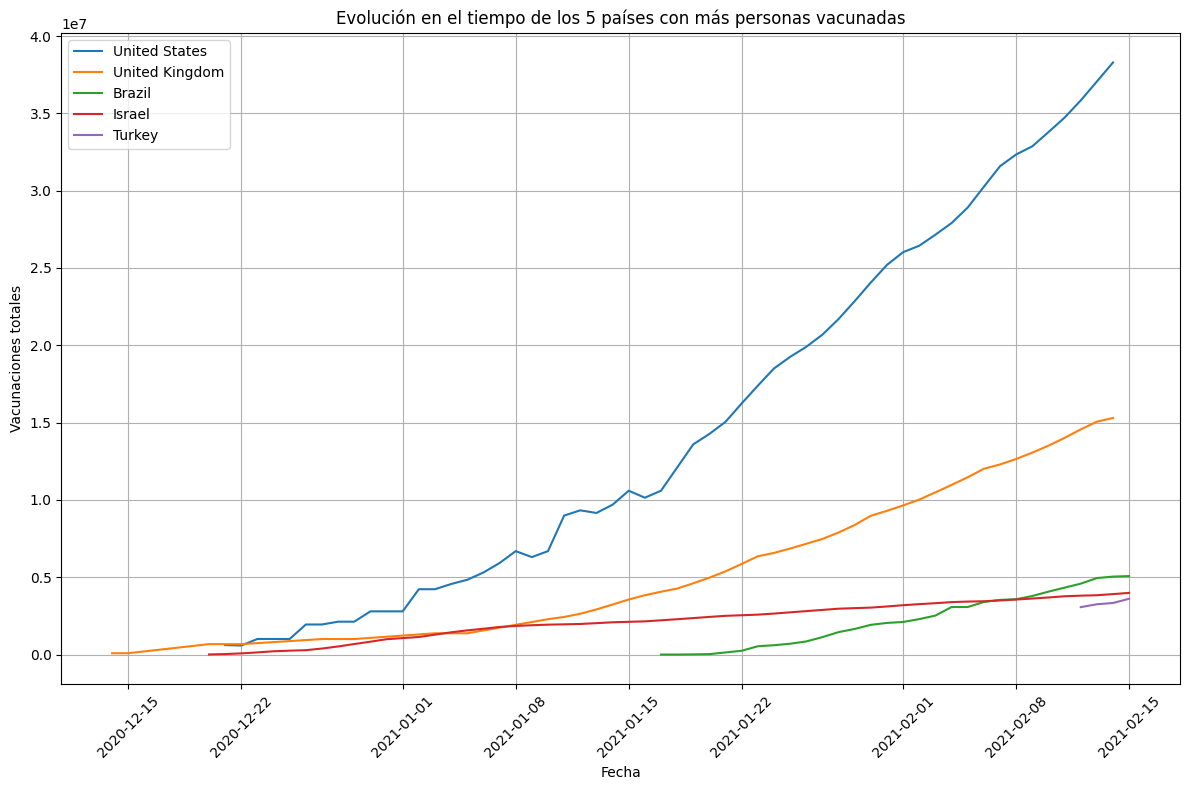

In [26]:
top_5_paises = datos.groupby('country')['people_vaccinated'].max().nlargest(5).index.tolist()
datos_top_5 = datos[datos['country'].isin(top_5_paises)]

plt.figure(figsize=(12, 8))
for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]
    plt.plot(datos_pais['date'], datos_pais['people_vaccinated'], label=pais)

plt.title('Evolución en el tiempo de los 5 países con más personas vacunadas')
plt.xlabel('Fecha')
plt.ylabel('Vacunaciones totales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
data_table = []

for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]['people_vaccinated']
    media = round(datos_pais.mean(), 3)
    desviacion_estandar = round(datos_pais.std(), 3)
    data_table.append([pais, media, desviacion_estandar])

print(tabulate(data_table, headers=["País", "Media", "Desviación estándar"], tablefmt="pretty"))

+----------------+--------------+---------------------+
|      País      |    Media     | Desviación estándar |
+----------------+--------------+---------------------+
| United States  | 15088859.136 |    11887066.966     |
| United Kingdom | 6455564.745  |     4732345.77      |
|     Brazil     |  2224696.0   |     1718218.781     |
|     Israel     | 2176133.569  |     1188610.53      |
|     Turkey     |  3316284.75  |     224586.588      |
+----------------+--------------+---------------------+


Podemos observar que tanto el Reino Unido como los Estados Unidos tienen desviaciones estándar muy altas en comparación con el resto de países, lo que indica una mayor variabilidad de los datos. Por otro lado, el país con la menor desviación estándar es Turquía; sin embargo, si nos fijamos en la gráfica previa, hay muy pocos datos disponibles para Turquía, lo que hace que su fiabilidad sea cuestionable. El segundo país con la menor desviación estándar es Israel, y de este sí tenemos una mayor cantidad de datos disponibles.

Podemos visualizar de una mejor manera la evolución de las personas vacunadas en todos los países en el siguiente gráfico.

In [28]:
datos['date'] = datos['date'].astype(str)
datos['iso_code'] = datos['iso_code'].astype(str)

fig = px.choropleth(
    datos,                         
    locations="iso_code",          
    color="people_vaccinated",                    
    hover_name="country",              
    animation_frame="date",
    color_continuous_scale='viridis',
    projection="natural earth",       
    range_color=[0, 5000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Número de personas vacunadas por país</span>'
)            

fig.show()

datos['date'] = pd.to_datetime(datos['date'])
datos = datos.sort_values('date', ascending=True)

c:\Users\alfre\Desktop\Utils\P1_MineriaDeDatos\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Resulta capcioso determinar que el país con el mejor plan de vacunación es aquel que tiene más personas vacunadas, ya que la población de todos los países no es uniforme. Aquellos con una población mayor pueden administrar más vacunas, lo que les otorga una 'ventaja' sobre aquellos con menos población. Por lo tanto, podemos estudiar las vacunaciones por cada cien habitantes para realizar una comparación más equitativa.

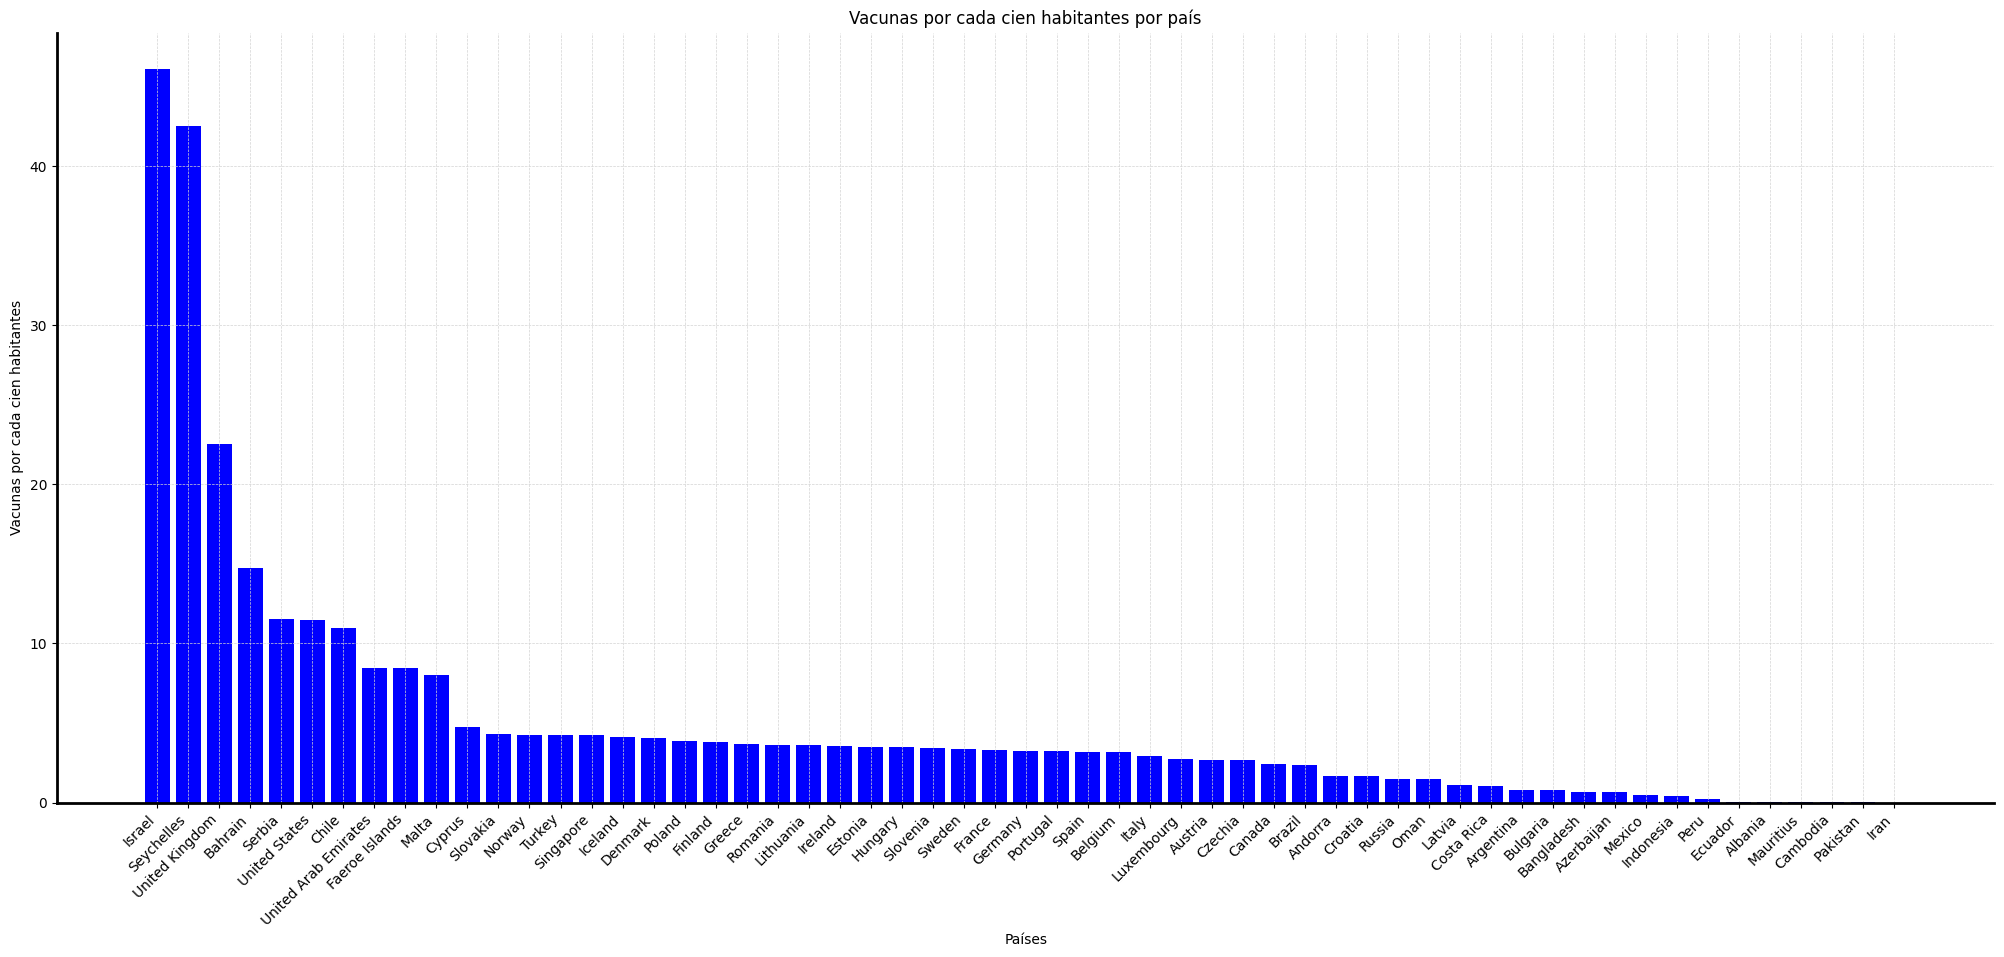

In [29]:
data = datos.sort_values('people_vaccinated_per_hundred', ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(data['country'], data['people_vaccinated_per_hundred'], color='blue')
plt.title('Vacunas por cada cien habitantes por país')
plt.xlabel('Países')
plt.ylabel('Vacunas por cada cien habitantes')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

Parece ser que tanto Israel como Seychelles son los países con los planes de vacunación más efectivos, ya que han logrado vacunar a más de un 40% de su población respectiva. Además, se distancian significativamente del tercer país con más vacunas por cada cien habitantes, el Reino Unido, que aparentemente ha logrado vacunar a un poco más del 20% de su población.

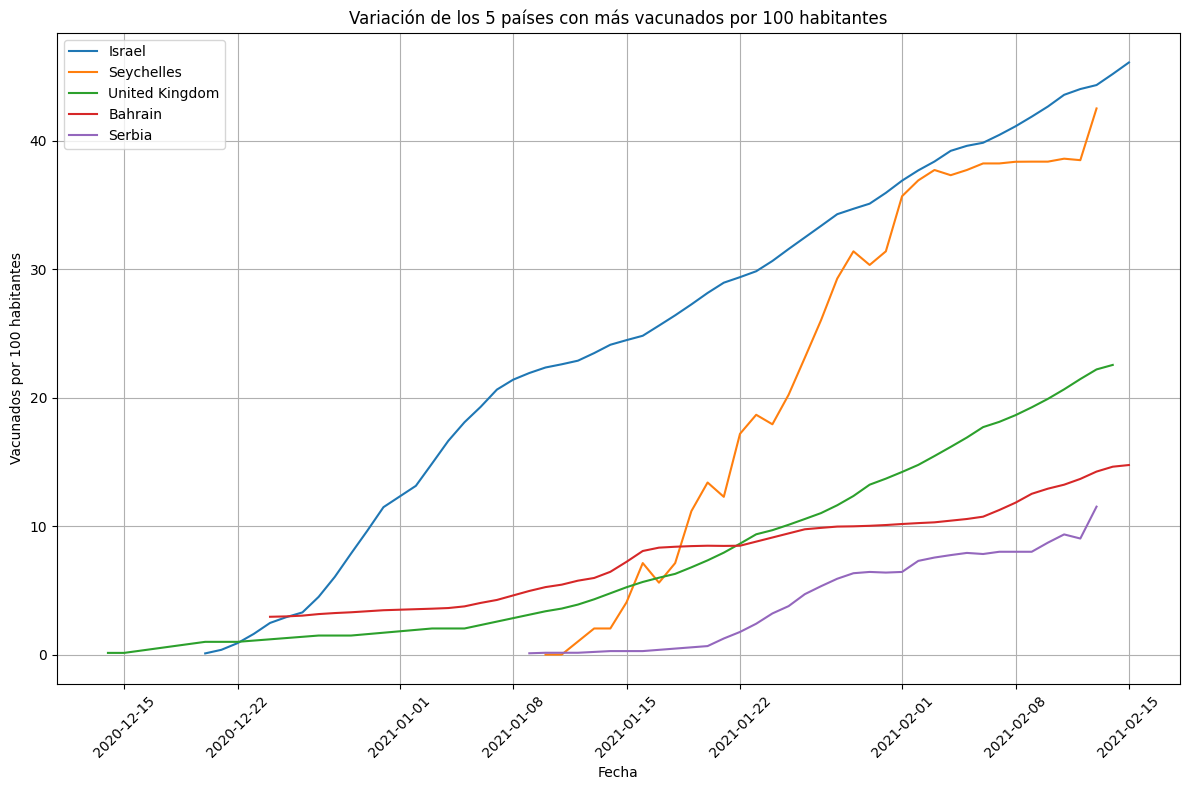

In [30]:
top_5_paises = datos.groupby('country')['people_vaccinated_per_hundred'].max().nlargest(5).index.tolist()
datos_top_5 = datos[datos['country'].isin(top_5_paises)]

plt.figure(figsize=(12, 8))
for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]
    plt.plot(datos_pais['date'], datos_pais['people_vaccinated_per_hundred'], label=pais)

plt.title('Variación de los 5 países con más vacunados por 100 habitantes')
plt.xlabel('Fecha')
plt.ylabel('Vacunados por 100 habitantes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
data_table = []

for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]['people_vaccinated_per_hundred']
    media = round(datos_pais.mean(), 3)
    desviacion_estandar = round(datos_pais.std(), 3)
    data_table.append([pais, media, desviacion_estandar])

print(tabulate(data_table, headers=["País", "Media", "Desviación estándar"], tablefmt="pretty"))

+----------------+--------+---------------------+
|      País      | Media  | Desviación estándar |
+----------------+--------+---------------------+
|     Israel     | 25.142 |       13.733        |
|   Seychelles   | 23.724 |        14.34        |
| United Kingdom | 9.509  |        6.971        |
|    Bahrain     | 7.782  |        3.671        |
|     Serbia     | 4.899  |        3.498        |
+----------------+--------+---------------------+


Israel y Seychelles tienen las tasas más altas de vacunación por cada cien habitantes, lo que podría indicar un progreso significativo en sus programas de vacunación. Sin embargo, la alta desviación estándar en estos países sugiere cierta variabilidad en el proceso de vacunación. El Reino Unido, a pesar de tener una tasa más baja, muestra una desviación estándar moderada, lo que podría indicar una mayor consistencia en el número de personas vacunadas. Bahréin y Serbia tienen tasas más bajas en comparación con los otros países mencionados, pero Bahréin muestra una desviación estándar relativamente baja, lo que sugiere una menor variabilidad en las vacunaciones en comparación con Serbia.

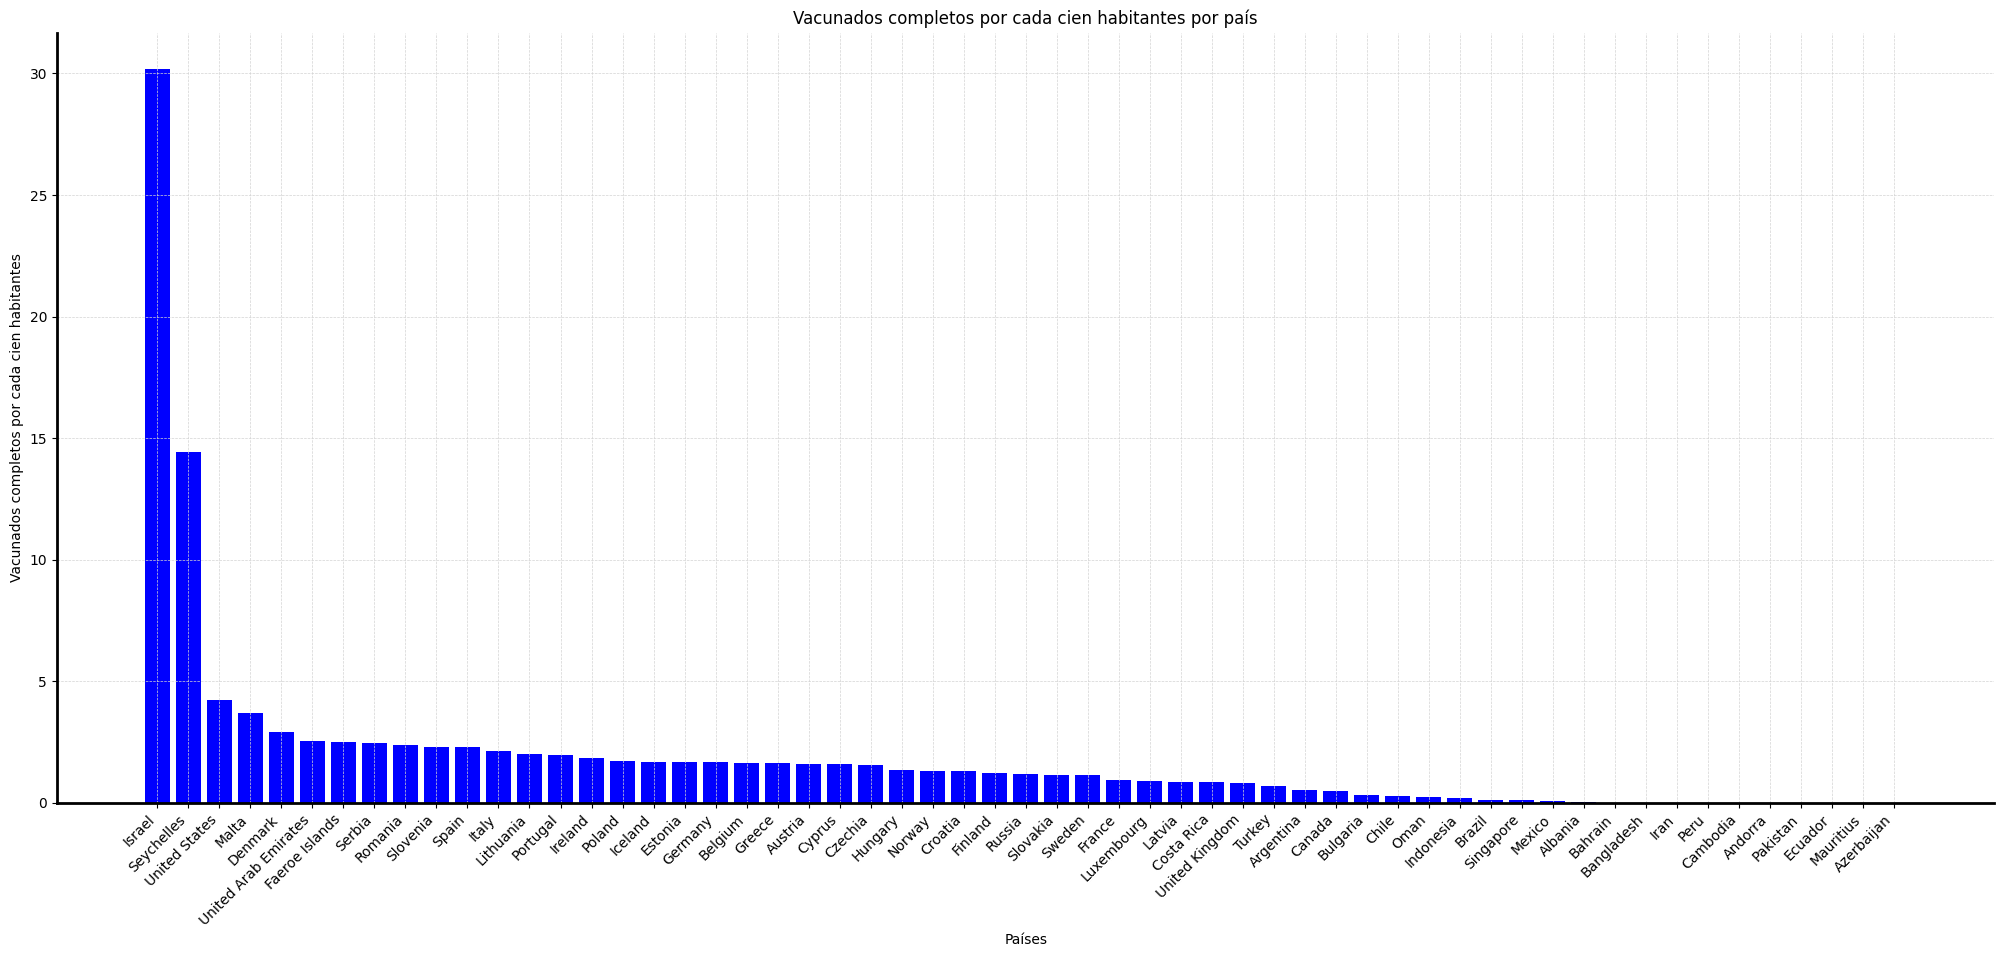

In [32]:
data = datos.sort_values('people_fully_vaccinated_per_hundred', ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(data['country'], data['people_fully_vaccinated_per_hundred'], color='blue')
plt.title('Vacunados completos por cada cien habitantes por país')
plt.xlabel('Países')
plt.ylabel('Vacunados completos por cada cien habitantes')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

Israel ocupa el primer lugar en cuanto al mayor número de vacunados completos por cada cien habitantes, con cerca del 30% de su población completamente vacunada. Además, duplica a Seychelles, que se encuentra en la segunda posición.

Israel ha logrado vacunar a una mayor proporción de su población, tanto de forma parcial como completa, en comparación con cualquier otro país. Además, su plan de vacunación se ha mantenido relativamente estable y constante, sin presentar grandes diferencias entre fechas. Podemos concluir que Israel tiene el plan de vacunación más efectivo.

# PRÁCTICA 2: SENSORES ATMOSFÉRICOS

Primero se importan las librerías necesarias para llevar a cabo la práctica y se cargará el .csv con datos meteorológicos de la UFV (Pozuelo).  Como la base de datos causa problemas con los nombres de las variables por errores sintácticos, se ha modificado previamente para cuadrar los nombres de las variables.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
url = 'https://github.com/Alf-caput/P1_MineriaDeDatos/raw/main/P2_SensoresAtmosfericos/ozone.csv'
df = pd.read_csv(url)
df.head()

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  203 non-null    int64  
 1   Day_of_month           203 non-null    int64  
 2   Day_of_week            203 non-null    int64  
 3   ozone_reading          203 non-null    float64
 4   pressure_height        203 non-null    int64  
 5   Wind_speed             203 non-null    int64  
 6   Humidity               203 non-null    int64  
 7   Temperature_Sandburg   203 non-null    int64  
 8   Temperature_ElMonte    203 non-null    float64
 9   Inversion_base_height  203 non-null    int64  
 10  Pressure_gradient      203 non-null    int64  
 11  Inversion_temperature  203 non-null    float64
 12  Visibility             203 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 20.7 KB


In [36]:
df.columns


Index(['Month', 'Day_of_month', 'Day_of_week', 'ozone_reading',
       'pressure_height', 'Wind_speed', 'Humidity', 'Temperature_Sandburg',
       'Temperature_ElMonte', 'Inversion_base_height', 'Pressure_gradient',
       'Inversion_temperature', 'Visibility'],
      dtype='object')

La base de datos contiene 12 variables con 203 datos no nulos cada una y son todas numéricas.  A continuación se estudiará si existen valores NaN en nuestros datos.

In [37]:
val_null = df.isna().any().any()

if val_null:
    print("Hay valores NaN en el DataFrame")
else:
    print("No hay valores NaN en el DataFrame")

No hay valores NaN en el DataFrame


A continuación se describirá la base de datos para obtener una visión general de los datos y consultarla si fuera necesario durante la resolución de los siguientes apartados.

In [38]:
df.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
Month,6.522167,3.594998,1.00,3.00,6.00,10.000,12.00
Day_of_month,15.704433,8.569537,1.00,9.00,15.00,23.000,31.00
Day_of_week,3.004926,1.401899,1.00,2.00,3.00,4.000,5.00
ozone_reading,11.373990,8.192652,0.72,4.77,8.90,16.075,37.98
pressure_height,5746.157635,113.027705,5320.00,5690.00,5760.00,5830.000,5950.00
Wind_speed,4.866995,2.105402,0.00,3.00,5.00,6.000,11.00
Humidity,57.610837,20.847662,19.00,46.00,64.00,73.000,93.00
Temperature_Sandburg,61.113300,14.206468,25.00,51.50,61.00,71.000,93.00
Temperature_ElMonte,56.542956,11.742668,27.68,49.64,56.48,66.200,82.58
Inversion_base_height,2601.748768,1859.889449,111.00,869.00,2083.00,5000.000,5000.00


##1.- (0,75 puntos) Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading, Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos obtenidos en cada caso.


Para poder hacer un análisis de los outliers, es importante conocer el rango que pueden tomar nuestras variables y conocer el dominio del tema que se está estudiando.

**Wind_Speed** : indica la velocidad del viento en km/h.  La velocidad del viento puede ir desde 0 km/h hasta más de 117 km/h en caso de huracanes, pero el rango para un viento suave o moderado sería de 0 km/h a 39 km/h, aproximadamente..

**ozone_reading**: contiene datos sobre la cantidad de Ozono (O3) en el aire. Se mide en µg/m3.  Puede tomar valores desde 0-  Hasta un valor de 40 µg/m3 no se considera dañino para la salud.

**Visibility**: mide, en metros, la distancia máxima a la cual es posible ver claramente.  Se mide horizontalmente.  La visión máxima de un humano es de 45.000 metros, por lo que podría estar relacionada con la visión captada por un sensor atmosférico.


In [39]:
df[['Wind_speed','ozone_reading','Visibility']].describe().drop('count').T

,mean,std,min,25%,50%,75%,max
Wind_speed,4.866995,2.105402,0.00,3.00,5.0,6.000,11.00
ozone_reading,11.373990,8.192652,0.72,4.77,8.9,16.075,37.98
Visibility,122.197044,81.171317,0.00,60.00,100.0,150.000,350.00


En cuanto a Wind_speed, se ve que los valores oscilan en un rango [0, 11] km/h, por lo que tan solo hay viento suave.

Los valores de ozone_reading se mueven dentro del rango [0, 37.98] µg/m3, por lo que se puede decir que hay baja contaminación en la zona de Pozuelo estudiada.

Por último, los valores de Visibility están dentro del rango [0, 350], por lo que podría suponerse que dichos valores van de 0 hasta 35.000 metros y se han dividido entre 100 para simplificar.  Para trabajar con esta variable será mejor categorizarla.

A simple vista no parece haber outliers, por lo que se verá analíticamente a continuación.

Uno de los mejores gráficos para observar la distribución de los datos y datos fuera de lo normal es el boxplot.  

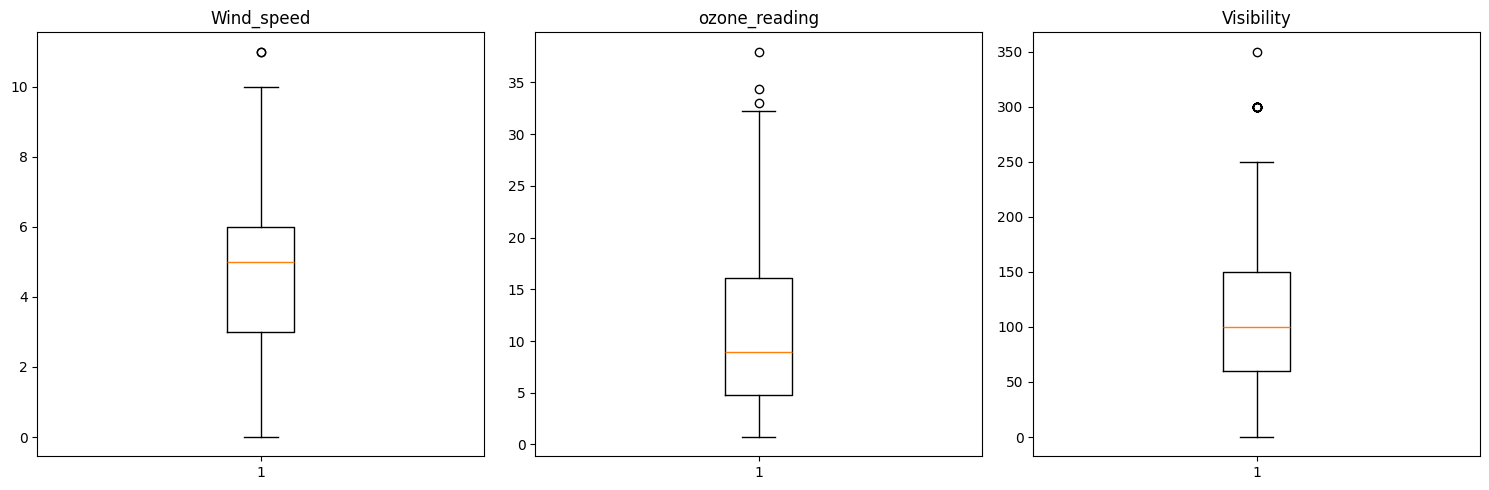

In [40]:
cols = ['Wind_speed','ozone_reading','Visibility']
fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 5))

for i, columna in enumerate(cols):
    axs[i].boxplot(df[columna])
    axs[i].set_title(columna)

plt.tight_layout()

plt.show()

Hay outliers en todas las variables.  En Wind_speed hay un outlier en 11 km/h, pero el rango 'normal' es [0, 11], que es un viento suave, por lo que el outlier no es desorbitado y no habría suficiente evidencia para eliminarlo.

En ozone_reading hay tres outliers alrededor de 33, 34 y 38 µg/m3, y siguen siendo baja contaminación, por lo que tampoco deberían ser eliminados.

En Visibility hay dos outliers bastante lejanos al resto de los datos, a diferencia de las anteriores variables.  Estos están en 30.000 y 35.000 metros, que son valores bastante más altos que el máximo valor dentro de los datos normales que está al rededor de 250 m.  Estos sí que podrían ser eliminados por su rareza, debido a que no se conoce bien el dominio de esta variable.

## 2.- (0,75 puntos) Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y “Visibility”.


Se calculan las fronteras a partir de las cuales se categorizan los outliers utilizando el "método de los bigotes".

In [41]:
import pandas as pd

selected_cols = ['Wind_speed', 'Visibility']
selected_df = df[selected_cols]

# Calcular el cuartil 1 (Q1) y el cuartil 3 (Q3)
Q1 = selected_df.quantile(0.25)
Q3 = selected_df.quantile(0.75)

IQR = Q3 - Q1
outliers_range = 1.5 * IQR

lower_bound = Q1 - outliers_range
upper_bound = Q3 + outliers_range

outlier_bounds = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

Unión de outliers:

In [42]:
outliers = (selected_df < lower_bound) | (selected_df > upper_bound)

outliers['cantidad_outliers'] = outliers.sum(axis=1)
outliers = outliers.sort_values(by='cantidad_outliers', ascending=False)

outliers.head()

,Wind_speed,Visibility,cantidad_outliers
22,True,True,2
54,False,True,1
162,False,True,1
30,False,True,1
29,False,True,1


Intersección de outliers:

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_range = 1.5 * IQR
lower_bound = Q1 - outliers_range
upper_bound = Q3 + outliers_range

outliers_Wind_speed = set(df[(df['Wind_speed'] < lower_bound['Wind_speed']) | (df['Wind_speed'] > upper_bound['Wind_speed'])].index)
outliers_visibility = set(df[(df['Visibility'] < lower_bound['Visibility']) | (df['Visibility'] > upper_bound['Visibility'])].index)
interseccion_outliers = outliers_Wind_speed.intersection(outliers_visibility)

print("Intersección de outliers:")
print(df.loc[list(interseccion_outliers)])

Intersección de outliers:
    Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
22      2             9            1           2.92             5490   

    Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
22          11        72                    37                38.48   

    Inversion_base_height  Pressure_gradient  Inversion_temperature  \
22                   5000                 32                  38.12   

    Visibility  
22         350  


La intersección tiene un solo elemento: el día 22 con los outliers 11 km/h de wind_speed y 35.000 m de visibility, ambos son los valores más grandes de cada variable, lo que podría indicar una relación directa entre ambas.  A continuación se graficará la matriz de correlación para verificar dicha relación.

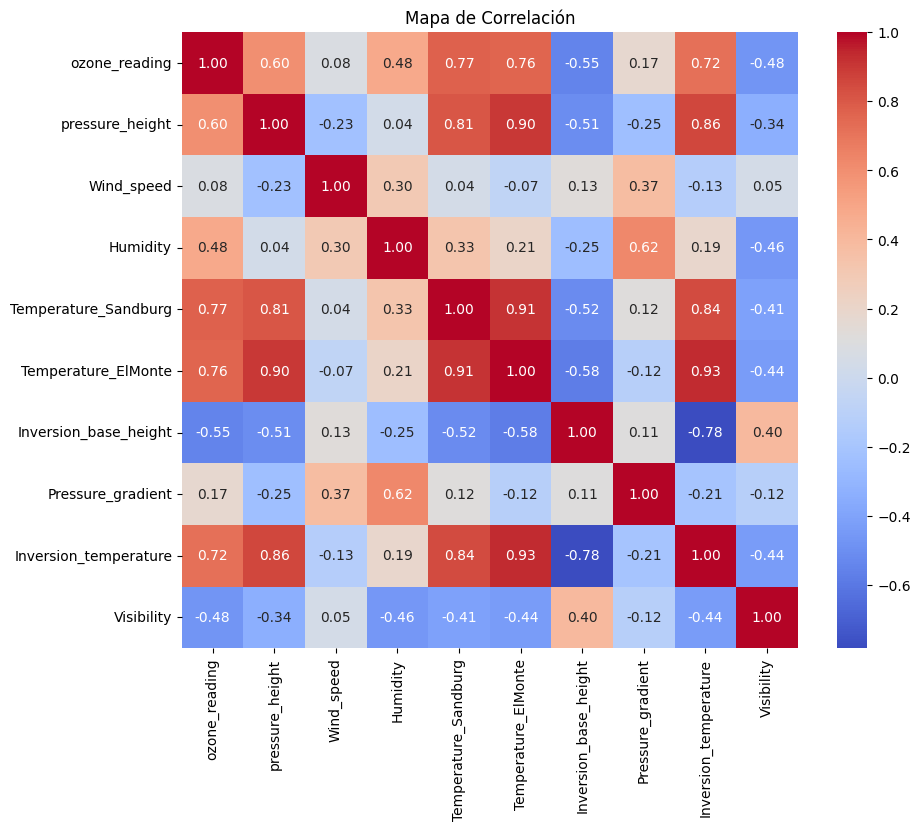

In [44]:
df_new = df.drop(columns=['Month', 'Day_of_month','Day_of_week'])
correlation_matrix = df_new.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlación')
plt.show()

La conclusión ha resultado ser errónea, pues el coeficiente de correlación entre las variables wind_speed y visibility es de 0.05, es decir, una correlación tan débil que puede negarse.

Ahora se analiza la unión de outliers:

In [45]:
union_outliers = outliers_Wind_speed.union(outliers_visibility)

print("\nUnión de outliers:")
print(df.loc[list(union_outliers)])


Unión de outliers:
     Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
64       4            14            3           6.76             5480   
197     12            22            3           4.25             5710   
22       2             9            1           2.92             5490   
23       2            10            2           4.08             5560   
24       2            12            4           8.32             5680   
28       2            20            5           5.73             5690   
29       2            23            1           4.04             5690   
30       2            24            2           6.04             5640   
162     10            27            3           2.61             5760   
35       3             2            2           3.22             5470   
36       3             3            3           2.79             5320   
166     11             5            5           4.91             5860   
59       4             7       

In [46]:
len(union_outliers)

18

Hay 18 días que contienen tanto outliers de Wind_speed como de Visibility.  Como ya se vio antes, todos esos outliers corresponden con los valores más altos en ambas variables, pero el coeficiente de correlación nos indica que no hay una relación directa entre ambas aunque pueda ser también una conclusión sobre la unión de los outliers.


## 3.- (1 punto) Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan relacionar diferentes variables ¿Qué nos dicen los datos?



Resulta interesante comparar la concentración de ozono con la velocidad del viento para examinar la dispersión de contaminantes por el aire, pues influye en la calidad del aire y en consecuencia en la salud pública.

Otra posible relación de variables podría ser la de la temperatura y presión atmosférica, pues se pueden detectar cambios en el clima, por ejemplo: una disminución en la presión atmosférica podría indicar la llegada de una tormenta o de frío.

La última relación que se realizará es una de las más importantes ya que está relacionada con la contaminación: la relación entre la temperatura de inversión y la concentración de ozono, pues se sabe que a más contaminación, más calor hace en el planeta.

**CATEGORIZACIÓN DE VARIABLES**

Se emplearán cuatro variables en este apartado y dos de ellas serán las que se categorizarán.

**wind_speed** : se dividirán los valores en 'Muy Suave' y 'Suave'.

In [47]:
lim = [0, 3, float('inf')]
etiqueta= ['Viento suave', 'Viento muy suave']
df['wind_category'] = pd.cut(df['Wind_speed'], bins=lim, labels=etiqueta, right=False)

**temperature_elmonte** : se dividirán los datos en 'Mucho frío', de 0 a 7 grados, 'Frío', de 8 a 17 grados, 'Fresco', de 18 a 26 grados, y 'Caluroso', de 26 grados en adelante.  Como los valores aparecen, aparentemente, en grados Farenheit, se pondrá en el código lo equivalente al grado Celsius en Farenheit.

In [48]:
lim = [26,47,65 ,78.8, float('inf')]
etiqueta = ['Mucho frío','Frío','Fresco','Caluroso']
df['tempelmonte_category'] = pd.cut(df['Temperature_ElMonte'], bins=lim, labels=etiqueta, right=False)

**inversion_temperature** : se van a distribuir los datos igual que en la anterior variable.

In [49]:
lim = [26,47,65,78.8, float('inf')]
etiqueta = ['Mucho frío','Frío','Fresco','Caluroso']
df['tempinversion_category'] = pd.cut(df['Inversion_temperature'], bins=lim, labels=etiqueta, right=False)

**RELACIÓN OZONE_READING Y WIND_SPEED**

Para estudiar esta relación se empleará un gráfico de dispersión y el coeficiente de correlación.

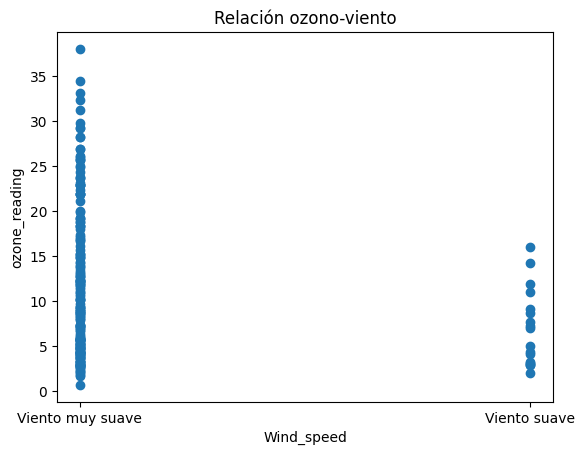

Coeficiente de correlación: 0.08179857982380298


In [50]:
# TODO : matriz de correlación (mapa calor)
import matplotlib.pyplot as plt

plt.scatter(df['wind_category'], df['ozone_reading'])
plt.xlabel('Wind_speed')
plt.ylabel('ozone_reading')
plt.title('Relación ozono-viento')
plt.show()

#COEFICIENTE DE CORRELACIÓN
correlation = df['Wind_speed'].corr(df['ozone_reading'])
print("Coeficiente de correlación:", correlation)

Se ha demostrado que las variables ozono y velocidad del tiempo tienen una débil relación lineal.  Tal y como se observa en el gráfico, con tiempo suave hay tanto contaminación alta como baja, y con viento ínfimamente más fuerte solo hay contaminación muy baja, pero esto no aporta ningún tipo de información.

Con respecto al coeficiente de relación, se ve que la relación es directamente proporcional al ser el coeficiente de correlación positivo (a más viento más contaminación en el aire), pero es una relación demasiado débil porque el valor es muy cercano al 0.

En definitiva, no hay suficiente evidencia para afirmar que la contaminación de ozono aumenta cuando más viento hay; por lo tanto, no sirve dicha relación para estudiar la contaminación en el aire.

**RELACIÓN PRESSURE_HEIGHT Y TEMPERATURE_ELMONTE**

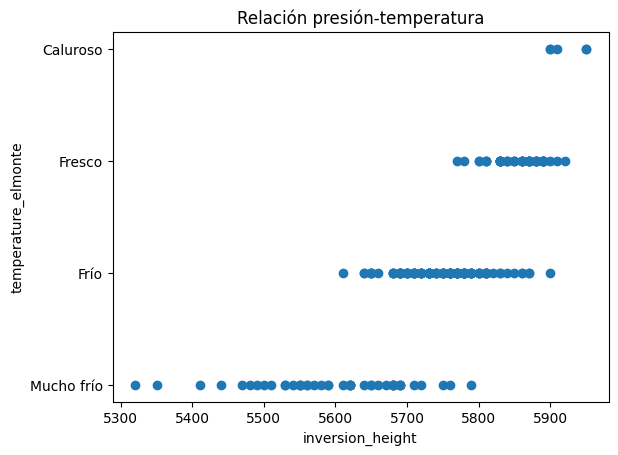

Coeficiente de correlación: 0.8968938521079244


In [51]:
plt.scatter(df['pressure_height'], df['tempelmonte_category'])
plt.xlabel('inversion_height')
plt.ylabel('temperature_elmonte')
plt.title('Relación presión-temperatura')
plt.show()

correlation = df['Temperature_ElMonte'].corr(df['pressure_height'])
print("Coeficiente de correlación:", correlation)

En el gráfico se ve que tiende a la derecha y a arriba.  Esto significa que hay correlación entre la presión atmosférica y la temperatura, pues para mismas temperaturas, mismas presiones.  Además, el coeficiente de correlación es positivo y muy cercano a 1 (casi 0.9), por lo que hay evidencia suficiente para afirmar que a más presión, más calor.

**RELACIÓN INVERSION_TEMPERATURE Y OZONE_READING**



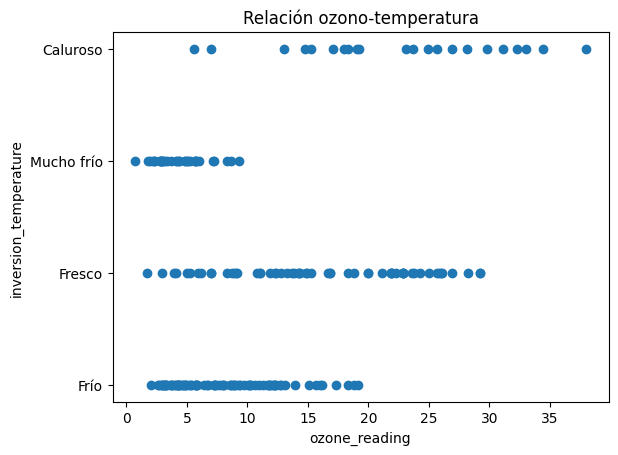

Coeficiente de correlación: 0.7175618600763661


In [52]:
plt.scatter(df['ozone_reading'], df['tempinversion_category'])
plt.xlabel('ozone_reading')
plt.ylabel('inversion_temperature')
plt.title('Relación ozono-temperatura')
plt.show()

#COEFICIENTE DE CORRELACIÓN
correlation = df['Inversion_temperature'].corr(df['ozone_reading'])
print("Coeficiente de correlación:", correlation)

En el gráfico se observa una evidente relación: al aumentar la concentración de ozono, aumenta la temperatura.  El coeficiente de correlación también sostiene esta afirmación.

## 4.- (1 punto) Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.

Las variables principales son: ozone_reading e inversion_temperature, pues parecen las más relacionadas con la contaminación.

<Axes: >

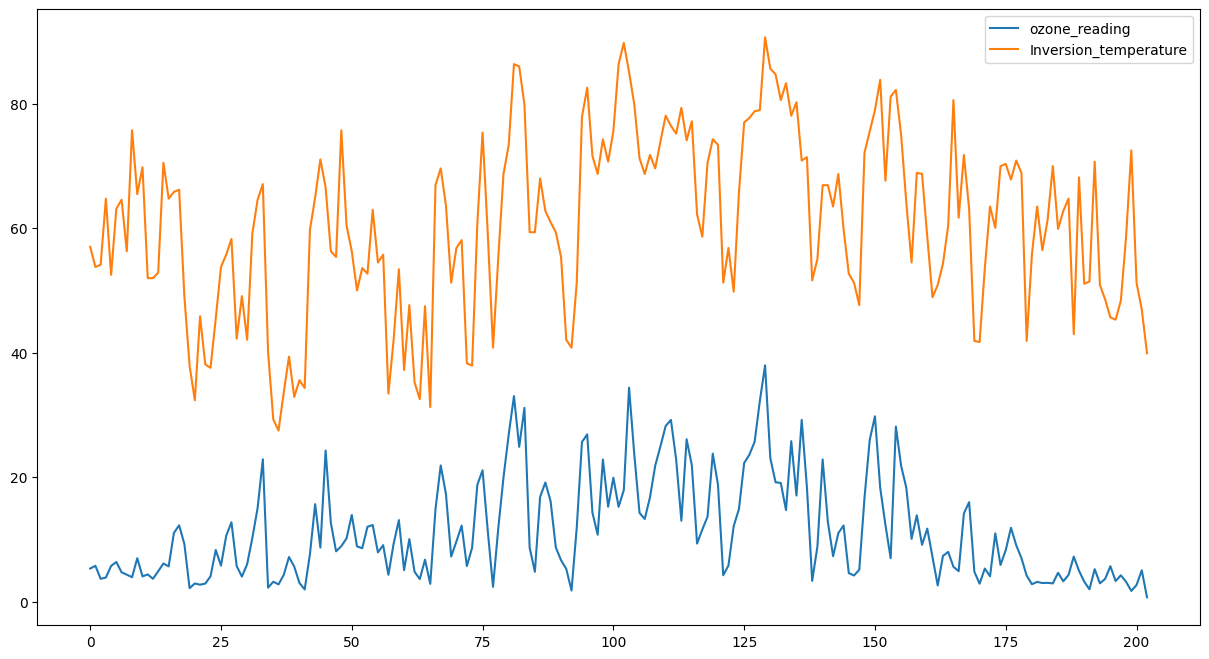

In [53]:
df[['ozone_reading','Inversion_temperature']].plot(figsize = (15,8))

Como ambas variables ya se vio que estaban relacionadas, en el anterior gráfico se ve claramente su relación directamente proporcional.  Ahora se estudiará la dsitribución de los datos.

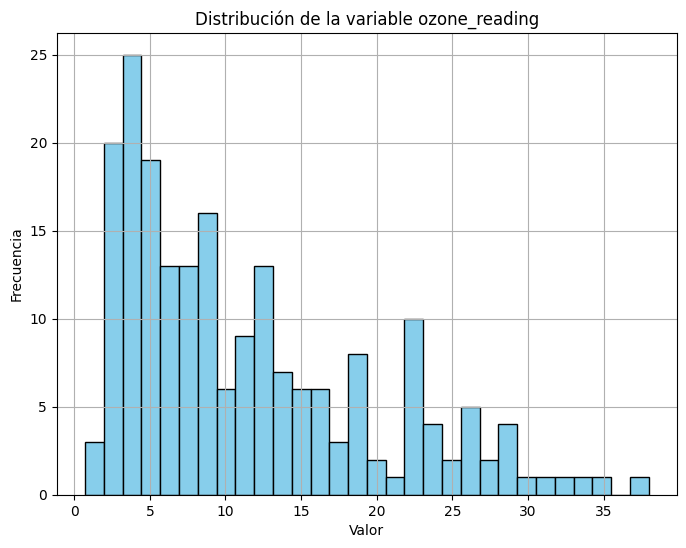

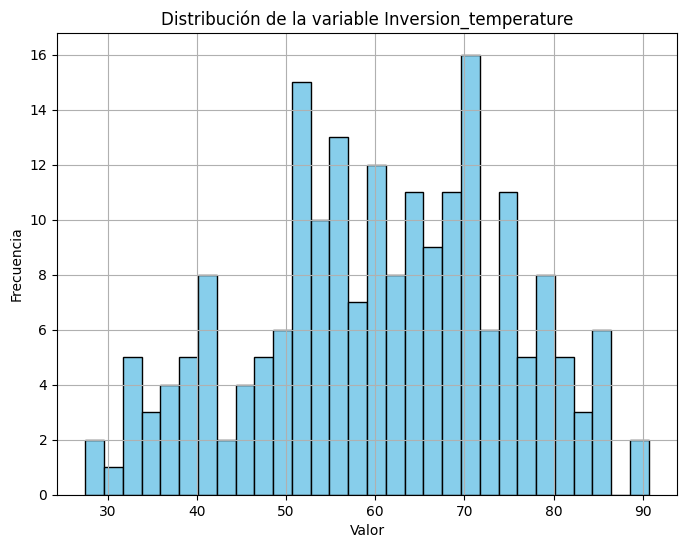

In [54]:
#histogramas de las variables principales
plt.figure(figsize=(8, 6))
plt.hist(df['ozone_reading'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable ozone_reading')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(df['Inversion_temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable Inversion_temperature')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El valor más frecuente de la concentración de ozono está al rededor de 3 µg/m3, que indica un valor muy bajo de contaminación, y el valor más frecuente de la temperatura de inversión está al rededor de 10-14 grados Celsius (50-57 F) y sobre todo al rededor de 21-22 grados Celsius (70-71 F).  Esto da altos indicios de que probablemente coincidan los valores frecuentes de ambas variables, por lo que puede ser que con la contaminación baja de 3 µg/m3 haya un clima fresco o caluroso.  La variable de temperatura parece distribuirse mediante una distribución normal mientras que la de ozono parece una distribución de Poisson o de exponencial negativa.  Esto tiene sentido porque la contaminación siempre suele ser mínima en Pozuelo, pero la temperatura varía meramente por el cambio de estación inevitable.

## REFERENCIAS

meteoblue. (2024). Datos climáticos y meteorológicos históricos simulados para Pozuelo de Alarcón.  https://www.meteoblue.com/es/tiempo/historyclimate/climatemodelled/pozuelo-de-alarc%C3%B3n_espa%C3%B1a_3112989


WINDFINDER. (2024).  Previsiones del viento y el tiempo.  Pozuelo de Alarcón.  https://es.windfinder.com/forecast/pozuelo_de_alarcon_madrid_spain


PCE Instruments. Tabla de las velocidades del tiempo.  https://www.pce-iberica.es/medidor-detalles-tecnicos/tablas-de-velocidades-del-viento.htm


TROTEC (2024).  Medidor de OZONO OZ-ONE. https://es.trotec.com/productos-y-servicios/aparatos-de-medicion/emision/gasometros/oz-one/